In [57]:
# Here We will attempt to repeat the same model as previous but with a fixed (but Random) Unitary
# sandwitched between the CNOT gates and tuned by the parameter \alpha (just as before) 

#Loading Packages

using LinearAlgebra 
using Kronecker
using Plots, PyPlot
using Random, Distributions


In [2]:
# Defining the Basic Logic Gates:



# The X,Y,Z Gates:

X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];



# The Hadamard and the S,T phase gates:

H=1/sqrt(2)*[1 1 ; 1 -1];
S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];


#The Rotations around X,Y,Z gates:


function RX(r)
    exp(-im*r/2*X)
end

function RY(r)
    exp(-im*r/2*Y)
end

function RZ(r)
    exp(-im*r/2*Z)
end



#The Two Body gates:


CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);


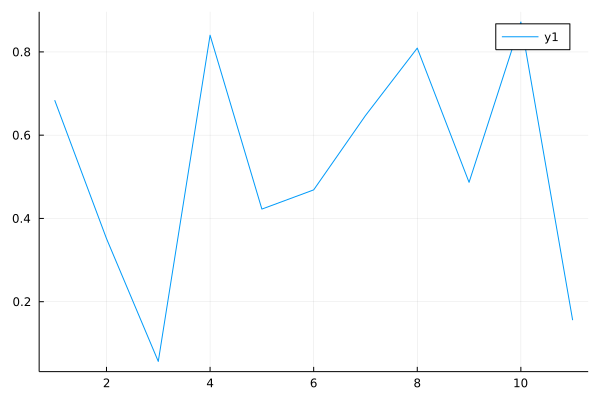

In [51]:
#The Random Field (Note the required Nesting):





#We will define one particular Unitary Parametrised by the angle \alpha
#which will then be sandwitched between two CNOTs to create non-trivial dynamics

RH=fill(0.1+im, 2,2); #Random Hermitian

RU=fill(fill(0.1+im, 2,2), 11); #Random Unitary
FU=fill(fill(0.1+im, 4,4), 11); #Random Unitary
RUZ=fill(fill(0.1+im, 2,2), 12); #Random Unitary



#Generating a GUE:

l = Normal(0, 0.50);   #off diagonal elements
d = Normal(0, 1.00);   #diagonal elements


    A=rand(l,2,2)+im*rand(l,2,2);
    for i in 1:dim(A)
        A[i,i]=rand(d)+im*rand(d);
    end
    
#Symmetrisation:
    
    RH=(A+A')/2;

alpha=pi/2;
Alp=rand(11);

for j in 1:length(RU)  
    RU[j]=exp(im*Alp[j]*RH);
    FU[j]=CNOT*kronecker(RU[j],RU[j])*CNOT;
end

plot(Alp)

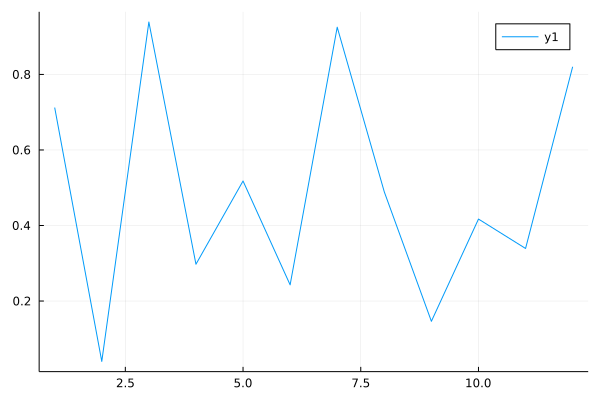

In [63]:
#Creating the Fields in Z direction:


#Generating a Random Field in Z direction:

h=rand(12);
plot(h)

In [64]:
#Preparing the Kronecker Products for the Unitary

o=pi;
XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)));
ZRowF=copy(kronecker(RZ(h[1]),RZ(h[2]),RZ(h[3]),RZ(h[4]),RZ(h[5]),RZ(h[6]),RZ(h[7]),RZ(h[8]),RZ(h[9]),RZ(h[10]),RZ(h[11]),RZ(h[12])));


In [52]:
    UOdd=copy(kronecker(FU[1],FU[2],FU[3],FU[4],FU[5],FU[6]));
    UEven=copy(kronecker(I(2),FU[7],FU[8],FU[9],FU[10],FU[11],I(2)));


In [65]:
 A=XRow*UEven*UOdd*ZRowF;

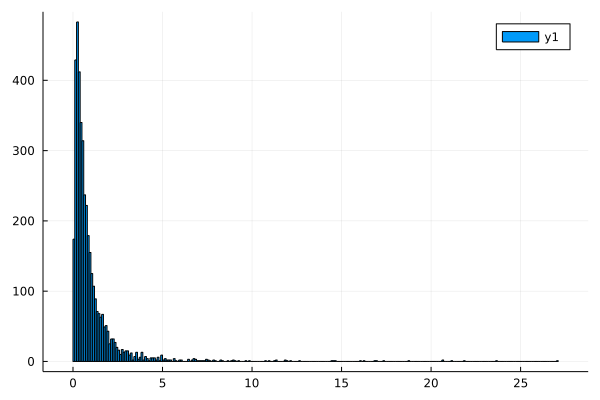

In [66]:

   
    
    EigA=eigvals(A);
    N=fill(0.1,length(EigA))


        for i in 1:length(EigA)
            N[i]=real(log(EigA[i])/(-im));
        end

    N= sort(N,rev=true);
    EigA1=copy(N);
    ls = deleteat!(EigA1,1);
    la = deleteat!(N,length(N));
    m=copy(la-ls)/mean(la-ls)
    
    
    
    
    n=fill(0.1,length(EigA)-2);

        for i in 1:length(n)
            #n[i]=m[i+1]/m[i];
            n[i]= minimum([m[i], m[i+1]])/maximum([m[i], m[i+1]]);
        end



 histogram(m)  


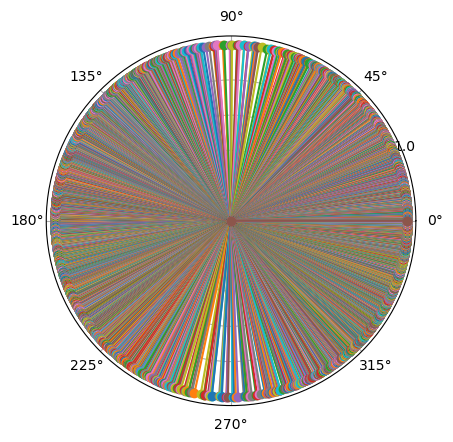

4096-element Vector{Vector{PyCall.PyObject}}:
 [PyObject <matplotlib.lines.Line2D object at 0x00000000D95A9270>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000683B00D0>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000683B0250>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000683B03D0>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000683B0550>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000D73C8460>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000D9937A00>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000D99340A0>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000D9937760>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000D9935BA0>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000D95A8AF0>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000D99342E0>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000D99374C0>]
 ⋮
 [PyObject <matplotlib.lines.Line2D object at 0x00000000EBD9F2E0>]
 [PyObject <m

In [67]:

polar.(Base.vect.(0.0,angle.(EigA)),Base.vect.(0.0,abs.(EigA)),marker="o")

In [55]:
mean(n)

0.5462268366767098

2×2 Matrix{ComplexF64}:
   0.977238-0.188594im  0.0712031-0.0660908im
 -0.0650203-0.072182im   0.956506+0.27506im

In [30]:
AM=kronecker(RX(pi),RX(pi))*FU[1]*kronecker(RZ(h[1]),RZ(h[2]))

4×4 transpose(::Matrix{ComplexF64}) with eltype ComplexF64:
  0.0113141-0.0498027im    …   -0.910151-0.407924im
 0.00255275+0.000567924im      0.0206792-0.0466979im
  0.0113141-0.0498027im       0.00238643+0.00106959im
  -0.971603-0.225308im         0.0210965-0.0465109im

In [32]:
EigAM=eigvals(AM)

4-element Vector{ComplexF64}:
  -0.948860759791605 - 0.3156948820106194im
 -0.9116260360147168 - 0.41102064481008127im
  0.9487528391820048 + 0.3160190661084926im
  0.9760906796608659 + 0.21736371610549113im

In [33]:
NA=fill(0.1,length(EigAM))

for i in 1:length(EigAM)
          #NA[i]=real(log(EigAM[i])/(-im));
          NA[i]=abs(EigAM[i]);
  
    #NA[i]=real(log(EigAM[i])/(-im));
        end

In [34]:
NA

4-element Vector{Float64}:
 1.0000000000000004
 1.0000000000000004
 0.9999999999999994
 0.9999999999999999

In [21]:
Zi=fill(fill(0.1+im, 4096,4096), 12);



Zi[1]=copy(kronecker(Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[2]=copy(kronecker(I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[3]=copy(kronecker(I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[4]=copy(kronecker(I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[5]=copy(kronecker(I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[6]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[7]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2)));
Zi[8]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2)));
Zi[9]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2)));
Zi[10]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2)));
Zi[11]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2)));
Zi[12]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z));

In [22]:
Cii=fill(0.1, 12,25);

In [46]:
At=I(4096);
for t in 1:25
   for l in 1:12
        LM=copy(Zi[l]*Zi[l]*At);
        Cii[l,t]=abs(LM[1,1]);
    end
    At=A*At;
end

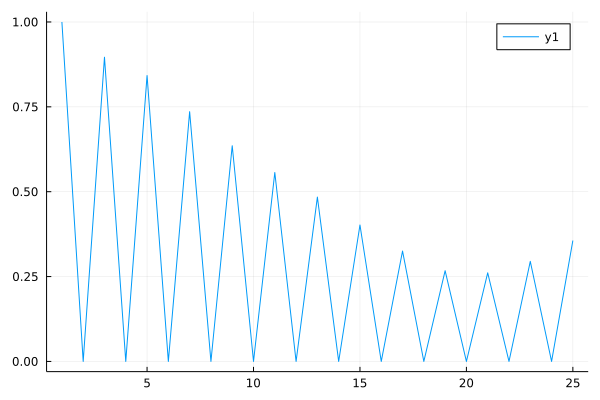

In [44]:
xax=1:25
plot(xax,Cii[5,:])

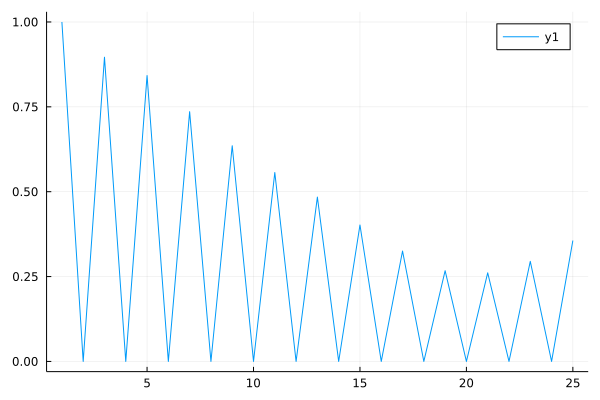

In [47]:
C=fill(0.1, 25);

for i in 1:25
    Cimp=copy(Cii[:,i]);
    C[i]=mean(Cimp);
end

xax=1:25
plot(xax,C)